In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import pandas_profiling as pp
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pac17 = pd.read_csv('PAC_2017_12.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')
pac14 = pd.read_csv('PAC_2014_10.csv', sep = ';', error_bad_lines = False, encoding = 'latin-1')

/home/fguer/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (3,10,11,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/fguer/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
pac17 = pac17.drop(columns = ['aaa'])

In [7]:
print(pac17.shape)
print(pac14.shape)

(33831, 16)
(56403, 18)


In [6]:
pac17.head(5)

,idn_empreendimento,idn_digs,dsc_titulo,investimento_total,sig_uf,txt_municipios,txt_executores,dsc_orgao,idn_estagio,dat_ciclo,dat_selecao,dat_conclusao_revisada,obra_latitude,obra_longitude,emblematica,observacao
0,1311.0,1001.0,Adequação Linha Férrea de Barra Mansa/RJ e construção de pátio - RJ,"143996640,8",RJ,"BARRA MANSA, VOLTA REDONDA",DNIT,"Ministério dos Transportes, Portos e Aviação Civil",70.0,31/12/2017,NaN,NaN,"22°32'24.000000""S","44°10'38.280000""O",NaN,NaN
1,1319.0,6002.0,Adutora São Francisco - SE,145380000.00,SE,ARACAJU,Estado,Ministério da Integração Nacional,70.0,31/12/2017,28/06/2013,NaN,"10°54'39.600000""S","37°4'18.840000""O",NaN,NaN
2,1337.0,1004.0,Aeroporto Porto Alegre - Ampliação da Pista de Pouso e Decolagem,NaN,RS,PORTO ALEGRE,Infraero,"Ministério dos Transportes, Portos e Aviação Civil",10.0,31/12/2017,NaN,NaN,"29°59'24.720000""S","51°10'37.200000""O",NaN,Valor não divulgado em razão da possibilidade de uso do Regime Diferenciado de Contratação - RDC.
3,1354.0,2000.0,Inventário - Bacia do Rio Trombetas - AM PA RR,24612000.00,AM PA RR,"NHAMUNDÁ/AM, ALENQUER/PA, ÓBIDOS/PA, ORIXIMINÁ/PA, CAROEBE/RR",Empresa de Pesquisa Energética,Ministério de Minas e Energia,71.0,31/12/2017,NaN,NaN,"1°46'10.573536""S","55°52'1.885512""O",NaN,NaN
4,1356.0,2000.0,Usina Hidrelétrica - Baixo Iguaçu - PR,1621994000.00,PR,"CAPANEMA, CAPITÃO LEÔNIDAS MARQUES",Consórcio Empreendedor Baixo Iguaçu,Ministério de Minas e Energia,70.0,31/12/2017,NaN,NaN,"25°30'31.680000""S","53°39'42.120000""O",NaN,NaN


In [7]:
pac14.head(5)

,idn_empreendimento,idn_digs,dsc_titulo,val_2011_2014,val_pos_2014,investimento_total,sig_uf,txt_municipios,txt_executores,dsc_orgao,idn_estagio,dat_ciclo,dat_selecao,dat_conclusao_revisada,val_lat,val_long,emblematica,observacao
0,1300,1000,BR-101/PE - Duplicação Subtrecho Divisa PE/PB - Igarassu - PE,114100000.0,NaN,NaN,PE,NaN,"DNIT, Exército",Ministério dos Transportes,90,31/10/2014,NaN,30/08/2013,NaN,NaN,EMBLEMATICA,NaN
1,1303,1000,BR-101/RN Subtrecho Ponta Negra/RN - Arêz/RN Duplicação e Adequação - Lote 1 - RN,20000000.0,NaN,NaN,RN,"ARÊS, PARNAMIRIM, NATAL, NÍSIA FLORESTA, SÃO JOSÉ DE MIPIBU",Exército,Ministério dos Transportes,90,31/10/2014,NaN,30/10/2012,NaN,NaN,EMBLEMATICA,NaN
2,1304,1000,BR-101/PE - Duplicação Subtrecho Ribeirão/PE - Palmares/PE - PE,16630000.0,NaN,NaN,PE,NaN,DNIT,Ministério dos Transportes,90,31/10/2014,NaN,31/03/2012,NaN,NaN,EMBLEMATICA,NaN
3,1311,1001,Adequação Linha Férrea de Barra Mansa/RJ e construção de pátio - RJ,62100000.0,62100000.0,NaN,RJ,"BARRA MANSA, VOLTA REDONDA",DNIT,Ministério dos Transportes,70,31/10/2014,NaN,NaN,"22°32'24.000000""S","44°10'38.280000""O",NaN,NaN
4,1315,6002,Adutora do Oeste - PE,NaN,NaN,NaN,PE,OROCÓ,Estado,Ministério da Integração Nacional,90,31/10/2014,30/06/2012,30/04/2012,"8°37'12.000000""S","39°36'7.200000""O",NaN,NaN


# Descrição dos dados

# Pré-processamento dos Dados

A coluna *investimento_total* no dataset ```pac17``` contém incosistências de formatação com valores em vírgula e ponto. A célula abaixo troca ```,``` por ```.``` e converte o formato da coluna para numérico.

In [8]:
pac17['investimento_total'] = pac17.investimento_total.replace(',','.', regex=True).astype('float64')

In [10]:
def change_type_by_name(data, string, final_type):
    for col in data.columns:
        if string in col:
            data[col] = data[col].astype(final_type)
    return data

In [11]:
pac17 = change_type_by_name(pac17, 'idn_', 'object')
pac14 = change_type_by_name(pac14, 'idn_', 'object')

In [12]:
pac14 = pac14.dropna(subset = ['sig_uf'])
pac17 = pac17.dropna(subset = ['sig_uf'])
pacba14 = pac14[pac14['sig_uf'].str.contains('BA')]
pacba17 = pac17[pac17['sig_uf'].str.contains('BA')]

In [13]:
pp.ProfileReport(pacba17)

Number of variables,17
Number of observations,3300
Total Missing (%),0.0%
Total size in memory,438.4 KiB
Average record size in memory,136.0 B
Numeric,5
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [14]:
pp.ProfileReport(pacba14)

Number of variables,19
Number of observations,5475
Total Missing (%),0.0%
Total size in memory,812.8 KiB
Average record size in memory,152.0 B
Numeric,7
Categorical,11
Boolean,0
Date,0
Text (Unique),0
Rejected,1


In [15]:
pacba14.shape

(5475, 18)

In [16]:
pacba17.shape

(3300, 16)

   ### Missing values

In [17]:
def plot_missing(df):
    columns = df.columns
    percent_missing = df.isnull().sum() * 100 / len(df)
    unique = df.nunique()
    dtypes = df.dtypes
    missing_value_data = pd.DataFrame({'column_name': columns,
                                     'percent_missing': percent_missing,
                                     'unique': unique,
                                     'types': dtypes})
    missing_value_data = missing_value_data[missing_value_data['percent_missing']>0]
    missing_value_data=missing_value_data.sort_values(by=['percent_missing'], ascending=False)
    
    plt.figure(figsize=(9, 6))
    ax = sns.barplot(x="column_name", y="percent_missing", hue='types', data=missing_value_data)
    ax.axhline(50, ls='--', color = 'r')
    ax.text(3,51,"50% of missing values", color = 'r')
    ax.set_title("Percentage of Missing Values by column")
    plt.xticks(rotation=45)
    print percent_missing
    plt.show()

/usr/lib/python2.7/dist-packages/seaborn/categorical.py:1508: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


idn_empreendimento        0.000000 
idn_digs                  0.000000 
dsc_titulo                0.000000 
investimento_total        12.969697
sig_uf                    0.000000 
txt_municipios            1.363636 
txt_executores            0.454545 
dsc_orgao                 1.757576 
idn_estagio               0.000000 
dat_ciclo                 0.000000 
dat_selecao               13.848485
dat_conclusao_revisada    51.303030
obra_latitude             5.696970 
obra_longitude            5.696970 
emblematica               99.363636
observacao                84.181818
dtype: float64


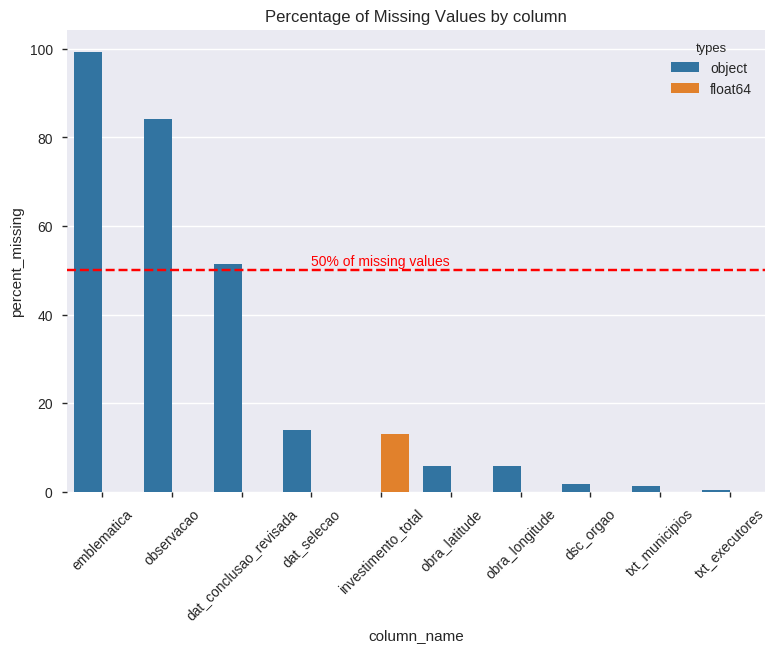

idn_empreendimento        0.000000 
idn_digs                  0.000000 
dsc_titulo                0.000000 
val_2011_2014             83.780822
val_pos_2014              98.191781
investimento_total        38.502283
sig_uf                    0.000000 
txt_municipios            0.876712 
txt_executores            7.397260 
dsc_orgao                 0.000000 
idn_estagio               0.000000 
dat_ciclo                 0.000000 
dat_selecao               16.347032
dat_conclusao_revisada    69.990868
val_lat                   80.694064
val_long                  80.694064
emblematica               99.525114
observacao                72.730594
dtype: float64


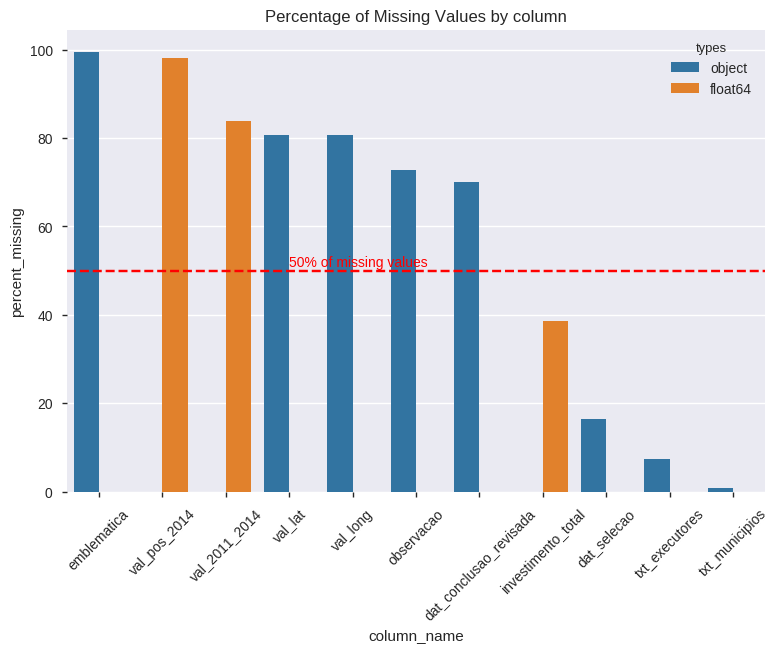

In [18]:
plot_missing(pacba17)
plot_missing(pacba14)

In [19]:
pacba14 = pacba14.drop(columns = ['emblematica', 'observacao', 'val_2011_2014', 'val_pos_2014', 'val_lat', 'val_long'])
pacba17 = pacba17.drop(columns = ['emblematica', 'observacao'])

In [20]:
pacba17 = pacba17.dropna(subset=['investimento_total', 'dat_selecao', 'obra_latitude', 'obra_longitude', 'txt_municipios'])
pacba14 = pacba14.dropna(subset=['investimento_total', 'txt_municipios', 'txt_executores', 'dat_selecao'])

In [21]:
def values_from_dates(df, day, month, year):
    df[day] = df.dat_conclusao_revisada.str.slice(0,2)
    df[month] = df.dat_conclusao_revisada.str.slice(3,5)
    df[year] = df.dat_conclusao_revisada.str.slice(6,10)
    return df
def conclusion_status(df, col):
    df[col] = np.where(df.dat_conclusao_revisada.notna(), 'sim', 'nao')
    return df

In [22]:
pacba17 = values_from_dates(pacba17,'dia_conclusao','mes_conclusao','ano_conclusao')
pacba14 = values_from_dates(pacba14,'dia_conclusao','mes_conclusao','ano_conclusao')
pacba14 = conclusion_status(pacba14, 'obra_concluida')
pacba17 = conclusion_status(pacba17, 'obra_concluida')

In [23]:
pacba17['dat_conclusao_revisada'] = pacba17.dat_conclusao_revisada.fillna(0)
pacba14['dat_conclusao_revisada'] = pacba14.dat_conclusao_revisada.fillna(0)
pacba17['dia_conclusao'] = pacba17.dia_conclusao.fillna(0)
pacba17['mes_conclusao'] = pacba17.mes_conclusao.fillna(0)
pacba17['ano_conclusao'] = pacba17.ano_conclusao.fillna(0)
pacba14['dia_conclusao'] = pacba14.dia_conclusao.fillna(0)
pacba14['mes_conclusao'] = pacba14.mes_conclusao.fillna(0)
pacba14['ano_conclusao'] = pacba14.ano_conclusao.fillna(0)

In [24]:
pacba17.head(10)

,idn_empreendimento,idn_digs,dsc_titulo,investimento_total,sig_uf,txt_municipios,txt_executores,dsc_orgao,idn_estagio,dat_ciclo,dat_selecao,dat_conclusao_revisada,obra_latitude,obra_longitude,dia_conclusao,mes_conclusao,ano_conclusao,obra_concluida
21,1567,6002,Sistema Adutor de Jacobina - BA,34260000.00,BA,JACOBINA,Estado,Ministério da Integração Nacional,70,31/12/2017,29/06/2012,0,"11°10'51.600000""S","40°31'4.800000""O",0,0,0,nao
286,8761,6002,Barragem Inhobim - Projeto - BA,3296676.16,BA,VITÓRIA DA CONQUISTA,Município,Ministério da Integração Nacional,90,31/12/2017,31/12/2012,07/06/2017,"14°51'42.916284""S","40°50'40.347636""O",07,06,2017,sim
384,9594,4000,Alagoinhas - BA - UBS - Alagoinhas - BA - UBS I,266666.67,BA,ALAGOINHAS,Município,Ministério da Saúde,90,31/12/2017,01/12/2010,23/02/2015,"12°8'43.450800""S","38°25'4.137600""O",23,02,2015,sim
385,9595,4000,Alcobaça - BA - UBS - Alcobaça - BA - UBS I,200000.00,BA,ALCOBAÇA,Município,Ministério da Saúde,90,31/12/2017,01/12/2010,06/07/2016,"17°31'27.991200""S","39°11'47.947200""O",06,07,2016,sim
386,9602,4000,Dias D'Ávila - BA - UBS - Dias D'Ávila - BA - UBS I,200000.00,BA,DIAS D'ÁVILA,Município,Ministério da Saúde,90,31/12/2017,01/12/2010,30/03/2015,"12°37'5.016000""S","38°18'39.754800""O",30,03,2015,sim
387,9604,4000,Ilhéus - BA - UBS - Ilhéus - BA - UBS I,200000.00,BA,ILHÉUS,Município,Ministério da Saúde,70,31/12/2017,01/12/2010,0,"14°47'21.112800""S","39°3'39.704400""O",0,0,0,nao
388,9605,4000,Juazeiro - BA - UBS - Juazeiro - BA - UBS I,200000.00,BA,JUAZEIRO,Município,Ministério da Saúde,70,31/12/2017,01/12/2010,0,"9°27'39.351600""S","40°29'43.418400""O",0,0,0,nao
389,9606,4000,Juazeiro - BA - UBS - Juazeiro - BA - UBS I,200000.00,BA,JUAZEIRO,Município,Ministério da Saúde,70,31/12/2017,01/12/2010,0,"9°8'36.682800""S","40°5'5.863200""O",0,0,0,nao
390,9607,4000,Juazeiro - BA - UBS - Juazeiro - BA - UBS I,200000.00,BA,JUAZEIRO,Município,Ministério da Saúde,70,31/12/2017,01/12/2010,0,"9°27'18.349200""S","40°24'59.338800""O",0,0,0,nao
391,9608,4000,Juazeiro - BA - UBS - Juazeiro - BA - UBS I,200000.00,BA,JUAZEIRO,Município,Ministério da Saúde,70,31/12/2017,01/12/2010,0,"9°21'12.808800""S","40°14'0.531600""O",0,0,0,nao


In [29]:
pacba17.dat_conclusao_revisada.unique()
pacba14.dat_conclusao_revisada.unique()

array([nan, u'03/09/2012', u'11/05/2014', u'18/12/2012', u'17/09/2014',
       u'07/06/2013', u'18/10/2012', u'19/09/2014', u'05/06/2014',
       u'21/05/2014', u'25/07/2013', u'28/11/2012', u'02/06/2014',
       u'06/08/2014', u'15/07/2013', u'15/03/2013', u'17/10/2012',
       u'08/04/2014', u'21/10/2013', u'22/04/2014', u'18/07/2012',
       u'01/08/2014', u'22/05/2013', u'12/05/2014', u'31/10/2012',
       u'23/09/2013', u'20/09/2013', u'07/08/2014', u'17/07/2013',
       u'17/12/2012', u'08/03/2013', u'04/07/2013', u'14/04/2014',
       u'21/08/2012', u'08/08/2013', u'30/07/2012', u'18/02/2013',
       u'22/11/2013', u'29/07/2014', u'11/04/2014', u'10/03/2014',
       u'24/10/2012', u'24/07/2014', u'14/05/2014', u'06/09/2013',
       u'29/04/2014', u'30/10/2012', u'04/12/2013', u'30/10/2014',
       u'31/12/2013', u'03/06/2014', u'31/03/2014', u'15/01/2013',
       u'04/06/2014', u'14/08/2014', u'31/07/2013', u'27/03/2014',
       u'30/05/2014', u'10/06/2014', u'23/08/2012', u'23/

In [26]:
assert pacba17.isnull().values.sum() == 0
assert pacba14.isnull().values.sum() == 0

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

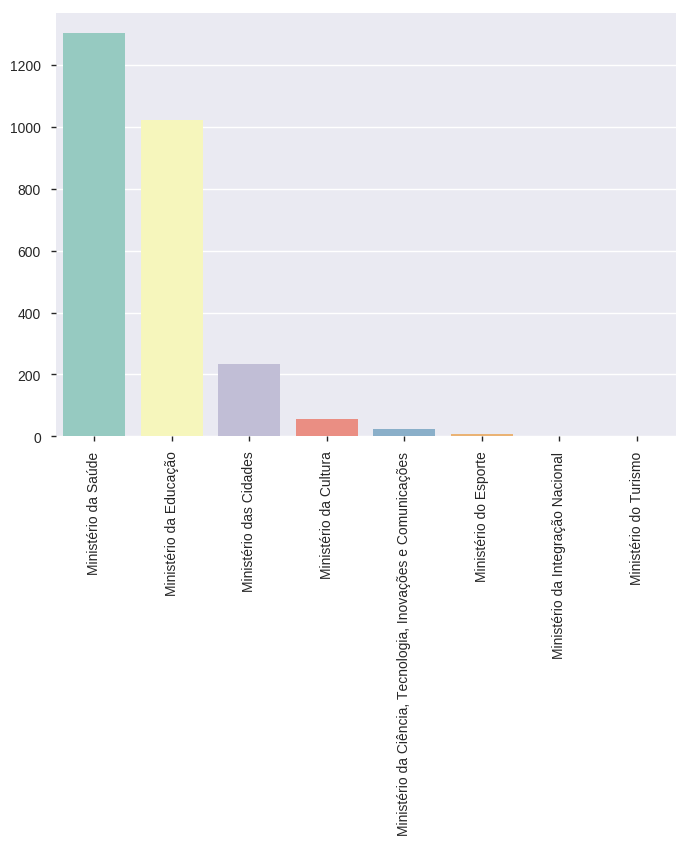

In [30]:
orgao_count = pacba17['dsc_orgao'].value_counts()
ax = sns.barplot(orgao_count.index, orgao_count.values, palette="Set3")
plt.xticks(rotation = 90)

In [28]:
pacba17.investimento_total.dtype

dtype('float64')

No boxplot abaixo é mostrado o investimento total de cada empreendimento por orgão ministerial ao qual pertence. Vê-se alguns outliers que precisam ser investigados.*Linha 2 do metrô em Salvador-BA trecho aeroporto - acesso Norte*

Get rows with outliers

In [24]:
outliers = pacba17[np.abs(stats.zscore(pacba17.investimento_total)) > 3]
pacba17_no_outliers = pacba17[np.abs(stats.zscore(pacba17.investimento_total)) < 3]
outliers = outliers[['dsc_titulo','investimento_total','txt_executores', 'dsc_orgao']]
outliers.sort_values(by = 'investimento_total' ,ascending = False)

,dsc_titulo,investimento_total,txt_executores,dsc_orgao
13619,Canalização e revestimentos na calha dos rios Jaguaribe e Canal Mangabeira com obras de arte e vias marginais - Salvador - BA,2.724676e+08,Estado,Ministério das Cidades
28512,Saneamento integrado na bacia do rio Itanhém - Teixeira de Freitas - BA,1.937811e+08,Município,Ministério das Cidades
13579,"Drenagem - Intervenções integradas de manejo de águas pluviais no Rio Ipitanga, e afluentes, e no Rio Joanes - Lauro de Freitas - BA",1.883822e+08,Estado,Ministério das Cidades
11719,"Abastecimento de Água - Vitória da Conquista, Belo Campo e Tremedal/BA - Barragem no Rio Catolé - Vitória da Conquista, Belo Campo, Tremedal - BA",1.882004e+08,Estado,Ministério das Cidades
4475,Saneamento integrado na Bacia do Rio Camaçari - Camaçari - BA,1.818008e+08,Município,Ministério das Cidades
4389,"Ampliação do SES na sede municipal - Salvador, Lauro de Freitas - BA",1.732053e+08,EMBASA,Ministério das Cidades
3973,"Ampliação do SES - Bacias Trobogy, Cambunas e Águas Claras - Despoluição da Baía de Todos os Santos - Salvador - BA",1.595023e+08,EMBASA,Ministério das Cidades
13632,Obras de Contenção de encostas em Salvador - Intervenção em setores de risco Alto e Muito Alto - Salvador - BA,1.580027e+08,Estado,Ministério das Cidades
13706,Pavimentação e Qualificação das Vias Urbanas do CAS - Salvador - BA,1.244527e+08,Estado,Ministério das Cidades
28509,Saneamento integrado na bacia dos rios Imbassaí e Jacumirim - Dias D'Ávila - BA,1.064620e+08,Município,Ministério das Cidades


In [25]:
list(outliers.dsc_orgao.unique())

[u'Minist\xe9rio das Cidades']

In [26]:
list(outliers.txt_executores.unique())

[u'EMBASA', u'Estado', u'Munic\xedpio']

In [27]:
# Make data: I have 3 groups and 7 subgroups
group_names=list(outliers.dsc_orgao.unique())
group_size=[outliers.loc[outliers['dsc_orgao'] == group_names[0],'investimento_total'].sum(),
            outliers.loc[outliers['dsc_orgao'] == group_names[1], 'investimento_total'].sum(),
            outliers.loc[outliers['dsc_orgao'] == group_names[2], 'investimento_total'].sum(),
            outliers.loc[outliers['dsc_orgao'] == group_names[3], 'investimento_total'].sum(),
            outliers.loc[outliers['dsc_orgao'] == group_names[4], 'investimento_total'].sum()]
subgroup_names=list(outliers.txt_executores.unique())
subgroup_size=[outliers.loc[outliers['txt_executores'] == subgroup_names[0],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[3],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[4],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[6],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[1],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[5],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[2],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[7],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[8],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[9],'investimento_total'].sum(),
               outliers.loc[outliers['txt_executores'] == subgroup_names[10],'investimento_total'].sum(),
              outliers.loc[outliers['txt_executores'] == subgroup_names[11],'investimento_total'].sum()]
 
# Create colors
a, b, c, d, e =[plt.cm.Blues, plt.cm.Reds, plt.cm.Greens, plt.cm.magma, plt.cm.afmhot]
 
# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), c(0.6), d(0.6), e(0.6)])
plt.setp( mypie, width=0.5, edgecolor='white')

# show it
plt.show()

IndexError: list index out of range

In [ ]:
ax = sns.boxplot(x= 'dsc_orgao', y='investimento_total', data = pacba17_no_outliers, palette="Set3")
plt.xticks(rotation = 90)

In [ ]:
pacba17[pacba17.idn_empreendimento == 35667].dsc_titulo

In [ ]:
#pacba17.sort_values('investimento_total',ascending=False)

In [ ]:
ax = sns.boxplot(x= 'idn_estagio', y='investimento_total', data = pacba17_no_outliers, palette="Set3")
plt.xticks(rotation = 90)

In [ ]:
pacba14.shape

In [ ]:
pacba17.shape